In [53]:
import pandas as pd
import numpy as np
import scipy
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline


# Extract for T-test

In [62]:
population = 10000
library = 1000
simulations = 10
steps = 50
filterbegins = 10


ifilter = 'None'
df_none = pd.read_pickle('SimResults/'+str([ifilter,simulations,' - ',population,library,steps,filterbegins]))

ifilter = 'top10'
df_top10 = pd.read_pickle('SimResults/'+str([ifilter,simulations,' - ',population,library,steps,filterbegins]))

In [63]:
df_top10

0    [[743.3261099105644, 712.6981152898984, 700.51...
1    [[255, 245, 245, 243, 239, 88, 84, 81, 81, 80,...
2    [60474, 60629, 60597, 60870, 61170, 60684, 608...
3    [69.109375, 68.890625, 68.90625, 69.03125, 69....
4                                                 True
dtype: object

In [64]:
def get_parameter_filter(ifilter,parameter,df):
    values = df[parameter]
    v_all = []
    for i in values:
        v_all = v_all + i
    all_values = v_all
    return all_values

def clean_values(values):
    cleaned = []
    dropped = 0
    
    for v in values:
        try:
            cleaned.append(float(v))
        except:
            dropped += 1
    print(dropped)
    return cleaned
            

0
0


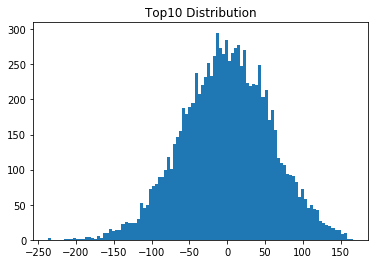

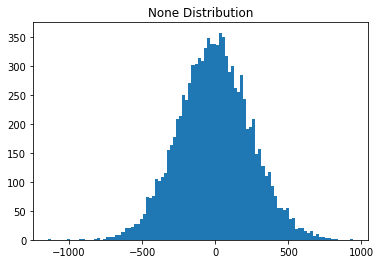

In [67]:
top10_r = get_parameter_filter(ifilter,0,df_top10)
top10_r = clean_values(top10_r)
top10_r.sort(reverse=True)

none_r = get_parameter_filter(ifilter,0,df_none)
none_r = clean_values(none_r)
none_r.sort(reverse=True)

top10_r = [i for i in top10_r if i < 400]
plt.title('Top10 Distribution')
plt.hist(top10_r,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_r,bins=100)
plt.show()

# Views

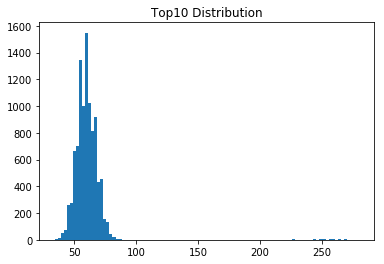

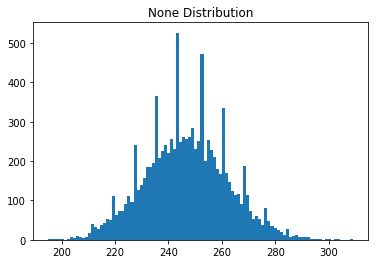

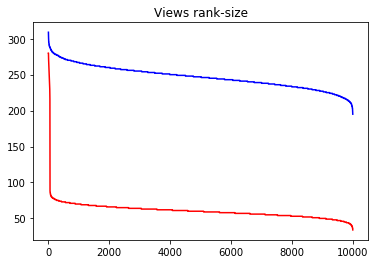

In [75]:
top10_v = get_parameter_filter(ifilter,1,df_top10)
top10_v.sort(reverse=True)

none_v = get_parameter_filter(ifilter,1,df_none)
none_v.sort(reverse=True)

plt.title('Top10 Distribution')
plt.hist(top10_v,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_v,bins=100)
plt.show()

none_v.sort(reverse=True)
top10_v.sort(reverse=True)
plt.plot(none_v,label='None',c='b')
plt.plot(top10_v,label='None',c='r')
plt.title('Views rank-size')
plt.show()

# T-test before Views ranking fix.

In [69]:
#For Ratings
var10 = np.var(top10_r)
varN = np.var(none_r)

In [70]:
var10, varN

(3412.9609159084025, 60354.49047292651)

In [71]:
#Then, calculate T-test for two independent sasmples, identical variances.
stats.ttest_ind(none_r,top10_r,axis=0,equal_var=False)

Ttest_indResult(statistic=-1.1689897066292625, pvalue=0.2424328103853359)

In [72]:
from scipy import stats